<a href="https://colab.research.google.com/github/JimohAR/it_core_project1/blob/main/notebooks/task1_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
The lifeblood of any business is its customers. Businesses are always finding ways to better understand their customers so that they can provide more efficient and tailored solutions to them. Exploratory Data Analysis is a fundamental step in the data science process. It involves all the processes used to familiarize oneself with the data and explore initial insights that will inform further steps in the data science process.

It is always better to explore each data set using multiple exploratory techniques and compare the results. The goal of this step is to understand the dataset, identify the missing values & outliers if any using visual and quantitative methods to get a sense of the story it tells. It suggests the next logical steps, questions, or areas of research for your project.

For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
●	Start by identifying the top 10 handsets used by the customers.
●	Then, identify the top 3 handset_manufacturers
●	Next, identify the top 5 handsets per top 3 handset_manufacturer
●	Make a short interpretation and recommendation to marketing teams

In telecommunication, CDR or Call Detail Record is the voice channel and XDR is the data channel equivalent. So here, consider XDR as data sessions Detail Record. In XDR, user behavior can be tracked through the following applications:  Social Media, Google, Email, Youtube, Netflix, Gaming, Other. 

 
 
Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   
●	Aggregate per user the following information in the column  
○	number of xDR sessions
○	Session duration
○	the total download (DL) and upload (UL) data
○	the total data volume (in Bytes) during this session for each application

Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing them with the mean of the corresponding column.
You’re expected to report about the following using  python script and slide  :
○	Describe all relevant variables and associated data types (slide). 
○	Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
○	Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and providing useful interpretation. 
○	Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpreting your findings.
○	Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings. 
○	Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 
○	Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data 
○	Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). 
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
base_path = os.path.abspath(os.getcwd().split("src")[0])
sys.path.append(base_path)

from src.scripts.utils import set_path
from src.scripts.utils import resolve_outlier_iqr

In [3]:
path = set_path("data")

In [4]:
data = pd.read_csv(path + "useful_data.csv")

In [5]:
# desc = pd.read_excel(path + "field_descriptions.xlsx").set_index("Fields")

In [6]:
data.select_dtypes(exclude ="object").describe()

,msisdn/number,dur._(ms),avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes),http_dl_(bytes),http_ul_(bytes),...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
count,1.489350e+05,1.500000e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,6.852700e+04,6.819100e+04,...,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,4.188282e+10,1.046086e+05,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,1.144710e+08,3.242301e+06,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.447443e+12,8.103762e+04,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,9.631946e+08,1.957064e+07,...,6.710591e+06,6.345445e+06,6.725240e+06,6.359511e+06,2.439683e+08,4.782716e+06,2.432058e+08,4.769020e+06,1.127639e+07,2.441429e+08
min,3.360100e+10,7.142000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,4.000000e+01,4.000000e+01,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,3.365130e+10,5.744050e+04,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,1.124035e+05,2.432200e+04,...,5.833482e+06,5.517962e+06,5.777095e+06,5.475977e+06,2.104706e+08,4.128424e+06,2.101824e+08,4.145904e+06,3.322201e+07,2.431068e+08
50%,3.366371e+10,8.639900e+04,45.000000,5.000000,63.000000,63.000000,5.687300e+05,2.094950e+04,1.941949e+06,2.297330e+05,...,1.161601e+07,1.101348e+07,1.164222e+07,1.099631e+07,4.234082e+08,8.291215e+06,4.218057e+08,8.267086e+06,4.114331e+07,4.558411e+08
75%,3.368349e+10,1.324302e+05,70.000000,15.000000,19710.750000,1120.000000,3.768308e+06,8.402025e+04,2.504290e+07,1.542827e+06,...,1.744855e+07,1.651559e+07,1.747050e+07,1.650729e+07,6.331747e+08,1.243163e+07,6.316950e+08,1.238420e+07,4.903424e+07,6.657055e+08
max,8.823971e+14,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,2.908226e+09,7.253064e+10,1.491890e+09,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


## User Overview Analysis
* Start by identifying the top 10 handsets used by the customers.

* Then, identify the top 3 handset_manufacturers

* Next, identify the top 5 handsets per top 3 handset_manufacturer

* Make a short interpretation and recommendation to marketing teams

In [7]:
handset_data = data[['handset_manufacturer', 'handset_type']]

# drop null rows
handset_data = handset_data.dropna()

In [8]:
# deal with "undefined" entries
handset_data[handset_data["handset_type"] == "undefined"] = np.nan

handset_data = handset_data.dropna()

In [9]:
total_handsets = len(handset_data)
total_handsets

140442

In [10]:
top10_handset = (handset_data["handset_type"]
                    .value_counts()[:10]
                    ) / total_handsets * 100

In [11]:
top10_handset#.plot(kind = "bar")

Huawei B528S-23A                14.064169
Apple iPhone 6S (A1688)          6.706683
Apple iPhone 6 (A1586)           6.424716
Apple iPhone 7 (A1778)           4.504351
Apple iPhone Se (A1723)          3.693340
Apple iPhone 8 (A1905)           3.555204
Apple iPhone Xr (A2105)          3.252588
Samsung Galaxy S8 (Sm-G950F)     3.218410
Apple iPhone X (A1901)           2.715000
Samsung Galaxy A5 Sm-A520F       2.651628
Name: handset_type, dtype: float64

In [12]:
top3_manufacturers = (handset_data["handset_manufacturer"]
                        .value_counts()
                        .head(3)
                        ) / total_handsets * 100

In [13]:
handset_data.groupby("handset_manufacturer").count().sort_values("handset_type", ascending=False)

,handset_type
handset_manufacturer,
Apple,59565
Samsung,40839
Huawei,34423
Sony Mobile Communications Ab,980
Wiko Global Sasu,747
...,...
Shenzhen Yiqingteng Electronic Technology Co Ltd,1
Sintave Technology (Group) Co Ltd,1
Sonim Technologies Inc,1


In [14]:
top3_manufacturers

Apple      42.412526
Samsung    29.078908
Huawei     24.510474
Name: handset_manufacturer, dtype: float64

In [15]:
# 96% of the phones used by the customers come from 3 phone manufacturers
top3_manufacturers.sum()

96.00190826106152

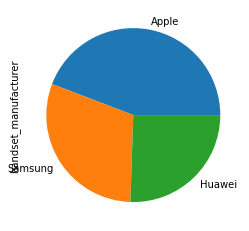

In [16]:
top3_manufacturers.plot(kind="pie");
# tasks - include the amount to the pie chart

In [17]:
handsets_by_top3_manufacturers = (handset_data.set_index(keys= ["handset_manufacturer"])
                                    .loc[top3_manufacturers.keys()]
                                    )

In [18]:
top5_of_top3_manufacturers_dict = dict()
for i in top3_manufacturers.keys():
    top5_of_top3_manufacturers_dict[i] = (handsets_by_top3_manufacturers
                                            .loc[i, "handset_type"]
                                            .value_counts()
                                            .head(5)
                                            ) / total_handsets * 100

In [19]:
top5_of_top3_manufacturers = pd.DataFrame.from_dict(top5_of_top3_manufacturers_dict, orient= "index").stack()
top5_of_top3_manufacturers.name = "count(%)"
top5_of_top3_manufacturers = top5_of_top3_manufacturers.to_frame()

top5_of_top3_manufacturers

count(%)
Apple   Apple iPhone 6S (A1688)          6.706683
        Apple iPhone 6 (A1586)           6.424716
        Apple iPhone 7 (A1778)           4.504351
        Apple iPhone Se (A1723)          3.693340
        Apple iPhone 8 (A1905)           3.555204
Samsung Samsung Galaxy S8 (Sm-G950F)     3.218410
        Samsung Galaxy A5 Sm-A520F       2.651628
        Samsung Galaxy J5 (Sm-J530)      2.631691
        Samsung Galaxy J3 (Sm-J330)      2.480739
        Samsung Galaxy S7 (Sm-G930X)     2.277809
Huawei  Huawei B528S-23A                14.064169
        Huawei E5180                     1.480326
        Huawei P20 Lite Huawei Nova 3E   1.439028
        Huawei P20                       1.053816
        Huawei Y6 2018                   0.709902

### Interpretation and recommendation

This analysis shows that the bulk of the phones used by the customers comes from three brands
- Apple
- Samsung
- Huawei

These three brands account for 96% (134,000+) of phones used by users

Promotions targetted to these phone brands may get more users of these phones to buy the company's services

## Task 1.1
Aggregate per user the following information in the column  
- number of xDR sessions
- session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application

In [20]:
# drop null values in msisdn, no much useful analysis can be done on entries with no msisdn
to_be_dropped_indices = data["msisdn/number"][data["msisdn/number"].isna()].index
data.loc[to_be_dropped_indices] = np.nan

data = data.dropna(how= "all")

del to_be_dropped_indices

In [21]:
no_of_xdr_sessions = data["msisdn/number"].value_counts()

no_of_xdr_sessions.describe()

count    106856.000000
mean          1.393792
std           0.806022
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          18.000000
Name: msisdn/number, dtype: float64

In [22]:
# figured out "dur._(ms)" is in seconds not milliseconds
total_sessions_duration = (data[["msisdn/number", "dur._(ms)"]]
                           .fillna(0).groupby(["msisdn/number"])["dur._(ms)"]
                           .sum()
                          ) / (60*60) #converting seconds to hrs

total_sessions_duration.describe()

count    106856.000000
mean         40.601988
std          51.766297
min           1.983889
25%          19.807778
50%          28.538889
75%          47.999722
max        5153.820556
Name: dur._(ms), dtype: float64

In [23]:
total_dl_ul_data = (data[["msisdn/number", "total_dl_(bytes)", "total_ul_(bytes)"]]
                    .fillna(0).groupby(["msisdn/number"])[["total_dl_(bytes)", "total_ul_(bytes)"]]
                    .sum()
                   ) / (2**20) # coverting bytes to mebibytes

In [24]:
total_dl_ul_data["total_data"] = total_dl_ul_data.sum(1)

total_dl_ul_data.describe() # values now in MiBs (mebibytes)

,total_dl_(bytes),total_ul_(bytes),total_data
count,106856.000000,106856.000000,106856.000000
mean,604.298287,54.654524,658.952812
std,443.034226,34.005785,468.307391
min,8.418161,2.734081,31.708726
25%,300.242485,34.709430,341.939838
50%,543.945048,44.626108,589.297426
75%,769.962778,62.686913,817.713878
max,7778.876775,695.779209,8436.419004


In [25]:
apps = ['social_media_dl_(bytes)', 'social_media_ul_(bytes)', 'google_dl_(bytes)',
        'google_ul_(bytes)', 'email_dl_(bytes)', 'email_ul_(bytes)', 'youtube_dl_(bytes)',
        'youtube_ul_(bytes)', 'netflix_dl_(bytes)', 'netflix_ul_(bytes)', 'gaming_dl_(bytes)',
        'gaming_ul_(bytes)', 'http_dl_(bytes)', 'http_ul_(bytes)', 'other_dl_(bytes)',
        'other_ul_(bytes)',
        ]

In [26]:
# filling null vals with 0, it's possible some apps weren't used by the customer
total_dl_ul_data_per_app = (data[apps + ["msisdn/number"]]
                            .fillna(0)
                            .groupby(["msisdn/number"])
                            [apps].sum()
                           ) / (2**20) # same MiBs convertion


In [27]:
# adding each app upload and download data together

total_data_per_app = pd.DataFrame()
count = 0
for i,j in enumerate(total_dl_ul_data_per_app.columns):
    if count == 0:
        total_data_per_app[j.split("_")[0]] = (total_dl_ul_data_per_app.iloc[:, i] 
                                                + total_dl_ul_data_per_app.iloc[:,i+1])
        count = (count + 1) % 2
    else: 
        count = (count + 1) % 2

In [28]:
total_data_per_app.describe()

,social,google,email,youtube,netflix,gaming,http,other
count,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000
mean,2.429931,10.378298,3.002926,30.096435,30.077298,571.984301,71.827712,570.782437
std,1.819647,7.195341,2.119446,20.308416,20.303304,428.343260,799.415252,428.125486
min,0.001491,0.038462,0.017334,0.075248,0.176019,0.292166,0.000000,0.142140
25%,1.155168,5.667339,1.596910,17.767991,17.696355,274.718392,0.000000,272.331153
50%,2.197033,9.142068,2.670121,25.558830,25.481119,517.224509,0.000275,514.824241
75%,3.154286,12.602558,3.668973,36.170936,36.217649,741.294992,1.654904,739.476710
max,41.365413,145.141460,40.453703,431.975144,381.011085,7390.434488,69637.954968,7789.495255


In [29]:
customers_xdr_data = (no_of_xdr_sessions.to_frame()
                        .join(total_sessions_duration)
                        .join(total_data_per_app)
                        .join(total_dl_ul_data)
                        )

In [30]:
customers_xdr_data.index.name = "msisdn"
customers_xdr_data.columns = ['tot_number_of_session', 'tot_sessions_duration_(hrs)',
                            'social_media_data_(mibs)', 'google_data_(mibs)',
                            'email_data_(mibs)', 'youtube_data_(mibs)',
                            'netflix_data_(mibs)', 'gaming_apps_data_(mibs)',
                            'http_data_(mibs)', 'other_apps_data_(mibs)',
                            'tot_downloaded_data_(mibs)', 'tot_uploaded_data_(mibs)',
                            'tot_data_(mibs)'
                            ]

In [31]:
customers_xdr_data.describe().style

,tot_number_of_session,tot_sessions_duration_(hrs),social_media_data_(mibs),google_data_(mibs),email_data_(mibs),youtube_data_(mibs),netflix_data_(mibs),gaming_apps_data_(mibs),http_data_(mibs),other_apps_data_(mibs),tot_downloaded_data_(mibs),tot_uploaded_data_(mibs),tot_data_(mibs)
count,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000
mean,1.393792,40.601988,2.429931,10.378298,3.002926,30.096435,30.077298,571.984301,71.827712,570.782437,604.298287,54.654524,658.952812
std,0.806022,51.766297,1.819647,7.195341,2.119446,20.308416,20.303304,428.343260,799.415252,428.125486,443.034226,34.005785,468.307391
min,1.000000,1.983889,0.001491,0.038462,0.017334,0.075248,0.176019,0.292166,0.000000,0.142140,8.418161,2.734081,31.708726
25%,1.000000,19.807778,1.155168,5.667339,1.596910,17.767991,17.696355,274.718392,0.000000,272.331153,300.242485,34.709430,341.939838
50%,1.000000,28.538889,2.197033,9.142068,2.670121,25.558830,25.481119,517.224509,0.000275,514.824241,543.945048,44.626108,589.297426
75%,2.000000,47.999722,3.154286,12.602558,3.668973,36.170936,36.217649,741.294992,1.654904,739.476710,769.962778,62.686913,817.713878
max,18.000000,5153.820556,41.365413,145.141460,40.453703,431.975144,381.011085,7390.434488,69637.954968,7789.495255,7778.876775,695.779209,8436.419004


### resolving outliers

In [32]:
# resolving any user with "tot_sessions_duration_(hrs)" greater than (30*24) hrs (30days)
outliers_index = (customers_xdr_data["tot_sessions_duration_(hrs)"]
                    [customers_xdr_data["tot_sessions_duration_(hrs)"] > (30*24)]
                    .keys()
                    )
customers_xdr_data.loc[outliers_index] = 30 * 24

In [33]:
# http data is showing some unlikely figures at 98th percentile, these are outliers
customers_xdr_data.describe(percentiles= [.25,.50,.75,.85,.9,.95,.98]).style

,tot_number_of_session,tot_sessions_duration_(hrs),social_media_data_(mibs),google_data_(mibs),email_data_(mibs),youtube_data_(mibs),netflix_data_(mibs),gaming_apps_data_(mibs),http_data_(mibs),other_apps_data_(mibs),tot_downloaded_data_(mibs),tot_uploaded_data_(mibs),tot_data_(mibs)
count,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000,106856.000000
mean,1.806235,40.324812,2.838378,10.755944,3.408844,30.397176,30.382313,570.231791,72.183433,569.054383,602.420231,54.864331,656.866803
std,17.322354,43.512921,17.371529,18.477530,17.389794,25.848816,25.876423,419.817749,799.525837,420.163164,433.848246,36.743852,458.027223
min,1.000000,1.983889,0.001491,0.038462,0.017334,0.075248,0.176019,0.292166,0.000000,0.142140,8.418161,2.734081,31.708726
25%,1.000000,19.807778,1.155168,5.667339,1.596910,17.767991,17.696355,274.718392,0.000000,272.331153,300.242485,34.709430,341.939838
50%,1.000000,28.538889,2.197033,9.142068,2.670121,25.558830,25.481119,517.224509,0.000290,514.824241,543.945048,44.626108,589.297426
75%,2.000000,47.999722,3.154286,12.602558,3.668973,36.170936,36.218038,740.828200,1.662344,738.960948,769.296982,62.686913,817.270981
85%,2.000000,64.759514,3.724730,15.872310,4.574492,45.907244,46.207541,872.326770,11.040541,871.627949,921.299316,82.637395,1004.782490
90%,2.000000,76.574167,4.606237,18.963583,5.523942,54.181999,54.320648,1079.368728,42.164950,1081.653010,1131.478220,93.638818,1219.671377
95%,3.000000,102.711458,5.798366,23.610501,6.880773,67.646064,67.690808,1361.458019,217.518780,1364.612220,1421.399042,118.694407,1521.048885


In [34]:
# resolving outliers with inter-quartile range (0,95) not because the figures are not possible but because
# models won't perform well with such high variance and it'll also remove the unlikely figures too

# DON'T RUN CELL MORE THAN ONCE !!!
customers_xdr_data = resolve_outlier_iqr(customers_xdr_data, [0,.95])

In [35]:
# by removing "other_apps_data_(mibs)" column the tot_data_(mibs) now looks really close to the
# sum of all apps data usage
(customers_xdr_data[[
                    'social_media_data_(mibs)', 'google_data_(mibs)',
                    'email_data_(mibs)', 'youtube_data_(mibs)',
                    'netflix_data_(mibs)', 'gaming_apps_data_(mibs)',
                    'http_data_(mibs)', #'other_apps_data_(mibs)',
                    ]].sum(1).to_frame()
                    .join(customers_xdr_data[["tot_data_(mibs)"]])
                ).describe()

,0,tot_data_(mibs)
count,106856.000000,106856.000000
mean,660.416122,655.570183
std,458.712740,451.911478
min,29.163984,31.708726
25%,343.518299,341.939838
50%,591.979564,589.297426
75%,820.898101,817.270981
max,3988.585203,3751.455527


In [36]:
abs(customers_xdr_data[[
                    'social_media_data_(mibs)', 'google_data_(mibs)',
                    'email_data_(mibs)', 'youtube_data_(mibs)',
                    'netflix_data_(mibs)', 'gaming_apps_data_(mibs)',
                    'http_data_(mibs)', #'other_apps_data_(mibs)',
                    ]].sum(1)
    - customers_xdr_data["tot_data_(mibs)"]
    ).describe(percentiles= [.25,.50,.75,.85,.9,.95,.98])

                            

count    106856.000000
mean         21.905654
std          57.758629
min           0.000149
25%           4.923961
50%           9.789597
75%          14.732403
85%          20.024391
90%          26.926246
95%          78.560095
98%         234.807965
max        2536.376588
dtype: float64

In [37]:
# dropping "other_apps_data_(mibs)" column
customers_xdr_data = customers_xdr_data.drop(columns= ["other_apps_data_(mibs)"])

In [38]:
# saving customers_xdr_data
customers_xdr_data.to_csv("customers_xdr_data.csv")